In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

plt.rcParams.update(**{'figure.dpi':150})
plt.style.use('ggplot') # can skip this - plots are more visually appealing with this style

In [10]:
use_cols = [
    # 29 columns out of 109
    "Year", "Month", "DayofMonth", "DayOfWeek", "DepTime", "CRSDepTime",
    "ArrTime", "CRSArrTime", "Reporting_Airline","Flight_Number_Reporting_Airline", 
    "Tail_Number", "ActualElapsedTime", "CRSElapsedTime", "AirTime", "ArrDelay", "DepDelay", "Origin", "Dest",
    "Distance", "TaxiIn", "TaxiOut", "Cancelled",
    "CancellationCode", "Diverted", "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay",
    "LateAircraftDelay"
]

In [14]:
total_rows = sum(1 for _ in open('On_Time_Reporting_Carrier_On_Time_Performance_2019_1.csv')) - 1
sample_size = 100000
skip_indices = sorted(random.sample(range(1, total_rows + 1), total_rows - sample_size))

reader = pd.read_csv(
    'On_Time_Reporting_Carrier_On_Time_Performance_2019_1.csv',
    usecols=use_cols,
    skiprows=skip_indices,
    chunksize=1000
)
jan = pd.concat([chunk for chunk in reader])
jan.head(3)

,Year,Month,DayofMonth,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,Dest,CRSDepTime,...,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2019,1,4,5,OO,N152SY,5669,SLC,DEN,1536,...,0,87.0,78.0,58.0,391,NaN,NaN,NaN,NaN,NaN
1,2019,1,4,5,OO,N693BR,5670,ORD,RIC,645,...,0,124.0,127.0,97.0,642,13.0,0.0,3.0,0.0,10.0
2,2019,1,4,5,OO,N213SY,5671,DEN,COS,1905,...,0,54.0,39.0,16.0,73,NaN,NaN,NaN,NaN,NaN


**Analysis 1**: Correlation between Departure and Arrival Delays

**Reasoning For This**: There might be a strong correlation between departure delays (DepDelay) 
and arrival delays (ArrDelay), since a flight that leaves late often arrives late.

          DepDelay  ArrDelay
DepDelay  1.000000  0.960969
ArrDelay  0.960969  1.000000


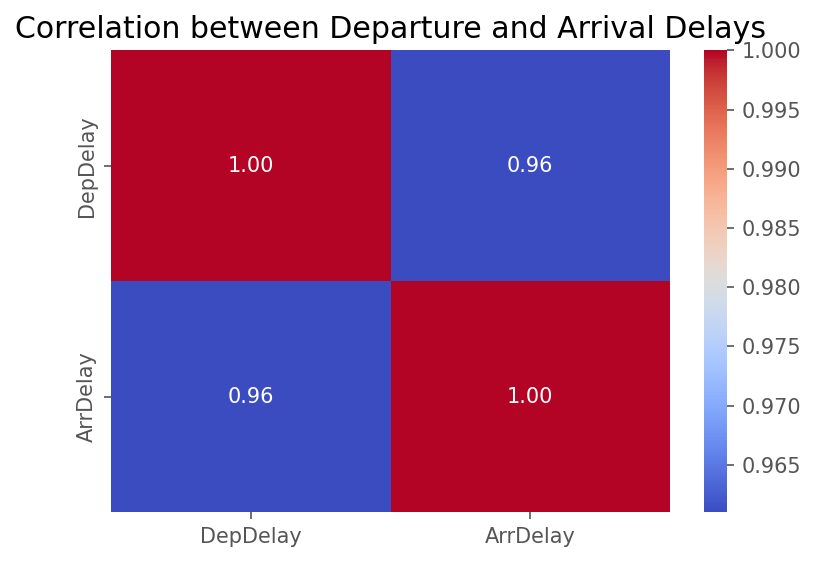

In [15]:
dep_arr_delay_corr = jan[['DepDelay', 'ArrDelay']].corr()
print(dep_arr_delay_corr)

plt.figure(figsize=(6, 4))
sns.heatmap(dep_arr_delay_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Departure and Arrival Delays')
plt.show()

**Analysis 2**: Distribution of Departure Delays

**Reasoning For This**: To understand the distribution of departure delays (DepDelay) 
and identify any skewness or outliers that may affect performance.

In [17]:
# Summary Statistics for Departure Delays
dep_delay_desc = jan['DepDelay'].describe()
print(dep_delay_desc)

count    97208.000000
mean         9.941476
std         49.565543
min        -47.000000
25%         -6.000000
50%         -3.000000
75%          5.000000
max       1637.000000
Name: DepDelay, dtype: float64


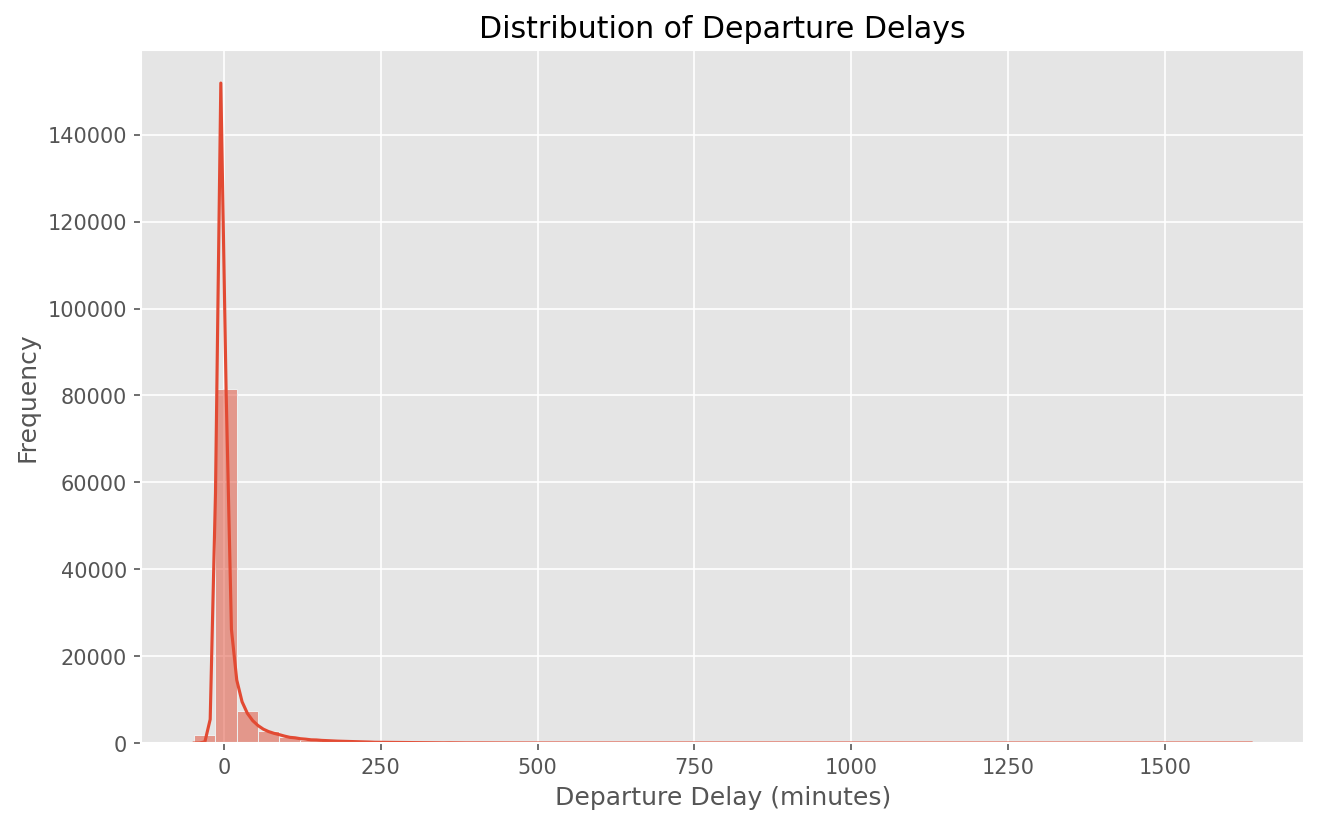

In [19]:
# Visualization of Departure Delays
plt.figure(figsize=(10, 6))
sns.histplot(jan['DepDelay'], bins=50, kde=True)
plt.title('Distribution of Departure Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

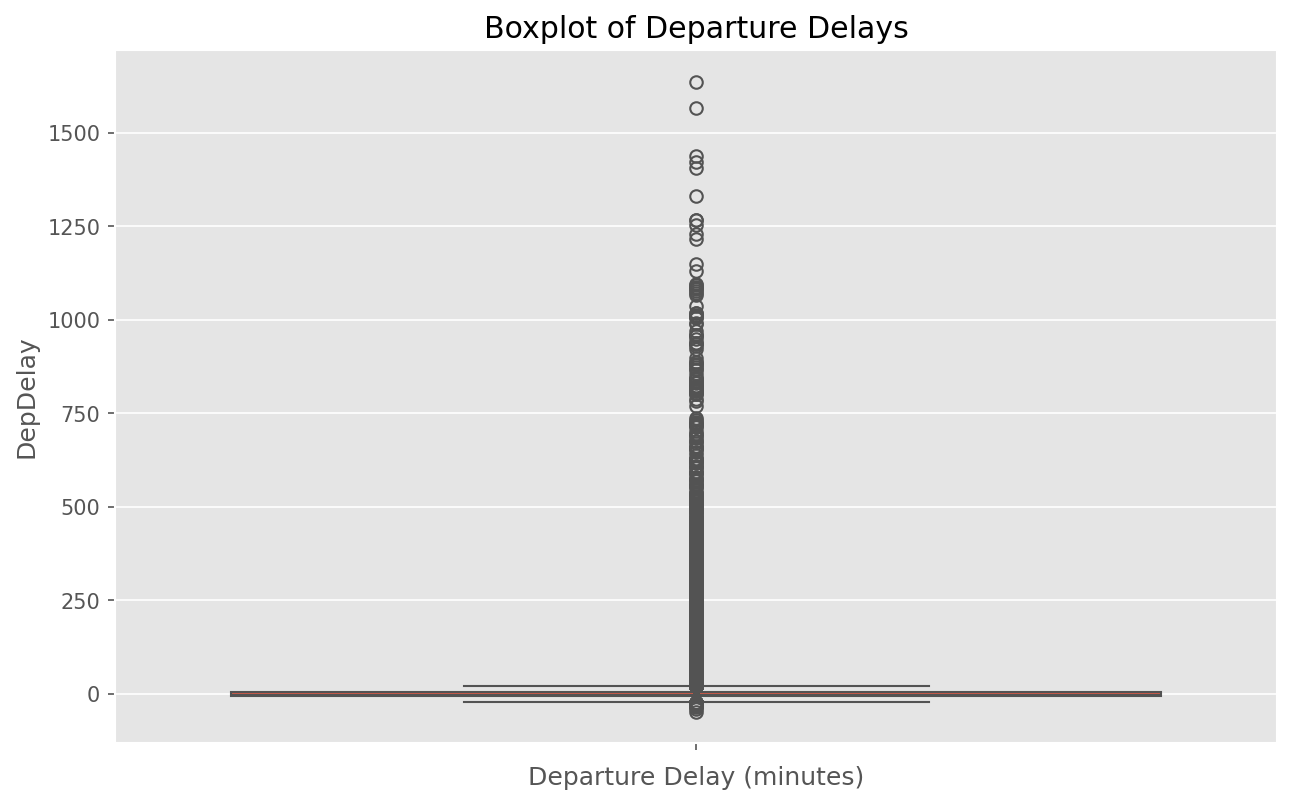

In [20]:
# Boxplot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(jan['DepDelay'])
plt.title('Boxplot of Departure Delays')
plt.xlabel('Departure Delay (minutes)')
plt.show()

**Analysis 3**: Taxi Times

**Reasoning For This**: To investigate the relationship between taxi-in and taxi-out times with the total flight delay 
to see if ground operations have a significant impact on flight punctuality.

In [22]:
# Calculating total delay as the sum of all individual delay components
jan['TotalDelay'] = jan['CarrierDelay'] + jan['WeatherDelay'] + jan['NASDelay'] + jan['SecurityDelay'] + jan['LateAircraftDelay']

# Correlation between taxi times and total delay
taxi_delay_corr = jan[['TaxiIn', 'TaxiOut', 'TotalDelay']].corr()
print(taxi_delay_corr)

              TaxiIn   TaxiOut  TotalDelay
TaxiIn      1.000000  0.023216    0.016387
TaxiOut     0.023216  1.000000    0.026401
TotalDelay  0.016387  0.026401    1.000000


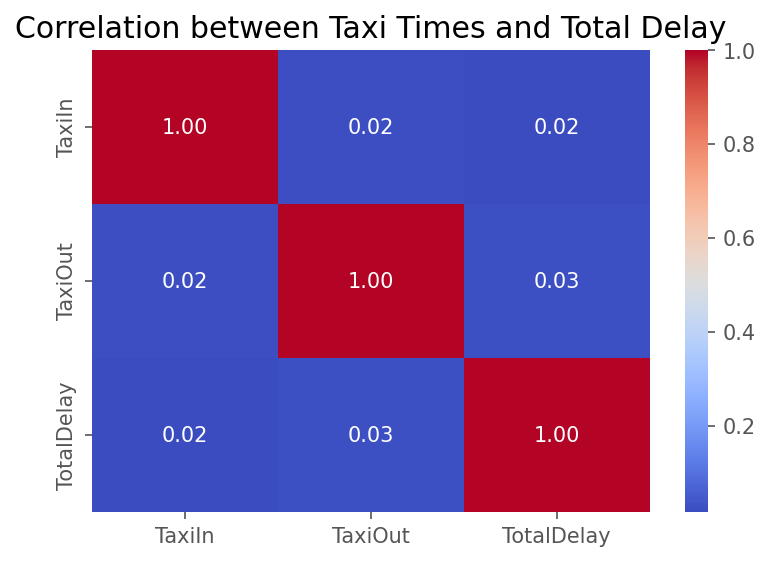

In [23]:
# Visualization of the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(taxi_delay_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Taxi Times and Total Delay')
plt.show()

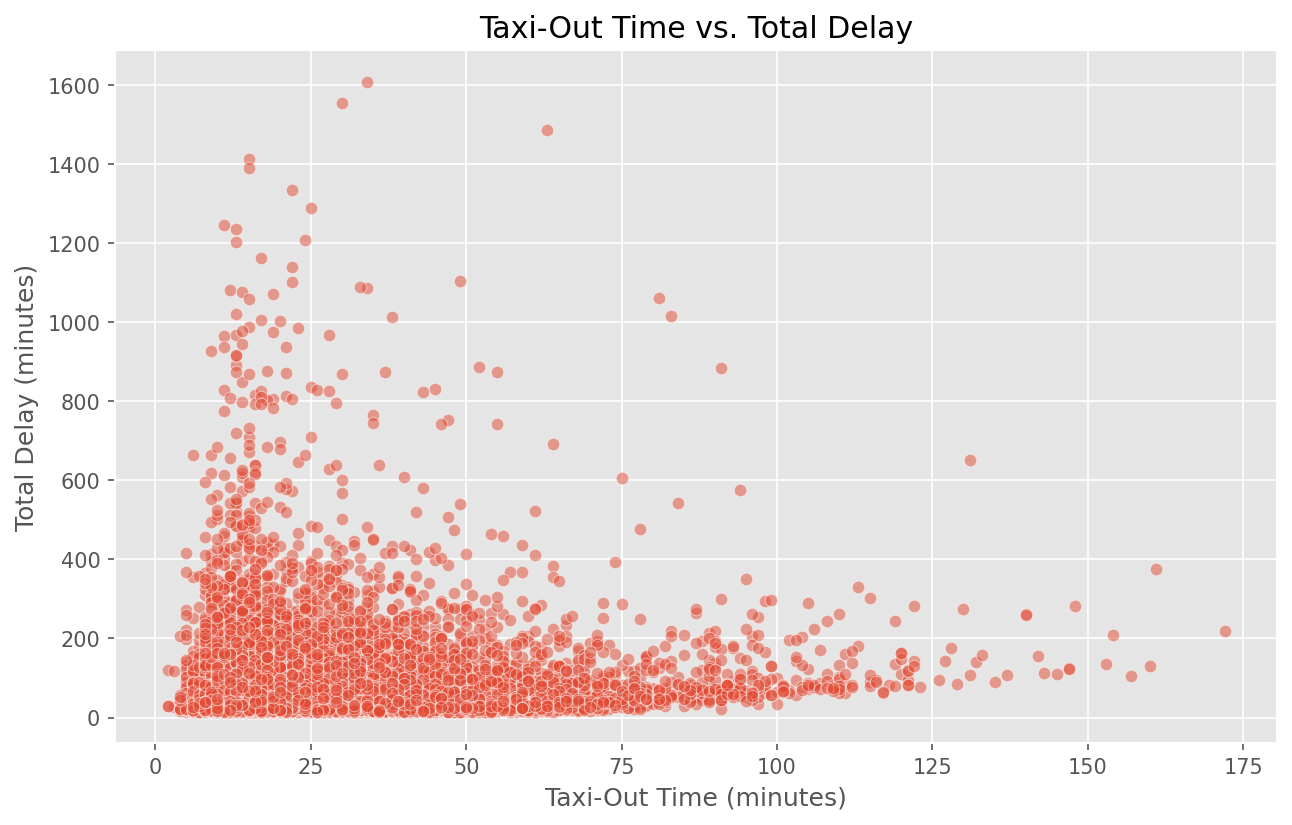

In [24]:
# scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TaxiOut', y='TotalDelay', data=jan, alpha=0.5)
plt.title('Taxi-Out Time vs. Total Delay')
plt.xlabel('Taxi-Out Time (minutes)')
plt.ylabel('Total Delay (minutes)')
plt.show()